# Résults

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd

In [2]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 10})

In [3]:
ds=pd.read_csv('Resultats_tests_PANGEO_HPC-OCCIGEN-mono.csv')  


In [19]:
visu=ds[ds['Queue']=='VISU']
cores_visu=visu['Cores']
workers_visu=visu['Workers']
memory_visu=visu['Memory in GB']
results_visu=visu[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_visu=results_visu.mean(axis=1)

In [20]:
min_worker_visu=workers_visu.min()
argmin_worker_visu=workers_visu.idxmin()
result_min_visu=mean_results_visu[argmin_worker_visu]
scale_visu=result_min_visu/(workers_visu/min_worker_visu)

In [5]:
hsw24=ds[ds['Queue']=='HSW24']
cores_hsw24=hsw24['Cores']
workers_hsw24=hsw24['Workers']
memory_hsw24=hsw24['Memory in GB']
results_hsw24=hsw24[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_hsw24=results_hsw24.mean(axis=1)

In [6]:
min_worker_hsw24=workers_hsw24.min()
argmin_worker_hsw24=workers_hsw24.idxmin()
result_min_hsw24=mean_results_hsw24[argmin_worker_hsw24]
scale_hsw24=result_min_hsw24/(workers_hsw24/min_worker_hsw24)

In [7]:
bdw28=ds[ds['Queue']=='BDW28']
cores_bdw28=bdw28['Cores']
workers_bdw28=bdw28['Workers']
memory_bdw28=bdw28['Memory in GB']
results_bdw28=bdw28[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_bdw28=results_bdw28.mean(axis=1)

In [8]:
min_worker_bdw28=workers_bdw28.min()
argmin_worker_bdw28=workers_bdw28.idxmin()
result_min_bdw28=mean_results_bdw28[argmin_worker_bdw28]
scale_bdw28=result_min_bdw28/(workers_bdw28/min_worker_bdw28)

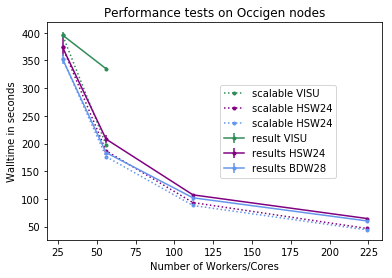

In [42]:
fig, ax = plt.subplots()
fig.figsize=(30, 40)
plt.errorbar(workers_visu, results_visu.mean(axis=1), yerr=results_visu.std(axis=1),
             ls='-',marker='o',ms=3,color='seagreen', 
             label='result VISU')
plt.plot(workers_visu, scale_visu, 
             ls=':',marker='o',ms=3,color='seagreen', 
             label='scalable VISU')
plt.errorbar(workers_hsw24, results_hsw24.mean(axis=1),yerr=results_hsw24.std(axis=1),
             ls='-',marker='o',ms=3,color='purple',
             label='results HSW24')
plt.plot(workers_hsw24, scale_hsw24, 
             ls=':',marker='o',ms=3,color='purple', 
             label='scalable HSW24')
plt.errorbar(workers_bdw28, results_bdw28.mean(axis=1),yerr=results_bdw28.std(axis=1),
             ls='-',marker='o',ms=3,color='cornflowerblue', 
             label='results BDW28')
plt.plot(workers_bdw28, scale_bdw28, 
             ls=':',marker='o',ms=3,color='cornflowerblue',
             label='scalable HSW24')

plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.5))
plt.xlabel('Number of Workers/Cores')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on Occigen nodes')
plt.savefig('Perf-occigen-workers.png', bbox_inches='tight')

In [10]:
min_memory_hsw24=memory_hsw24.min()
argmin_memory_hsw24=memory_hsw24.idxmin()
result_min_memory_hsw24=mean_results_hsw24[argmin_memory_hsw24]
scale_memory_hsw24=result_min_memory_hsw24/(memory_hsw24/min_memory_hsw24)

In [11]:
min_memory_bdw28=memory_bdw28.min()
argmin_memory_bdw28=memory_bdw28.idxmin()
result_min_memory_bdw28=mean_results_bdw28[argmin_memory_bdw28]
scale_memory_bdw28=result_min_memory_bdw28/(memory_bdw28/min_memory_bdw28)

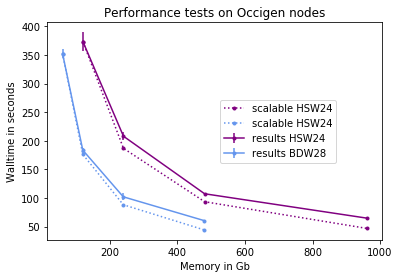

In [43]:
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

fig, ax = plt.subplots()
fig.figsize=(8, 8)
#plt.errorbar(memory_visu, results_visu.mean(axis=1), yerr=results_visu.std(axis=1),
#             ls='-',marker='o',ms=3,color='seagreen', 
#             label='results VISU')
plt.errorbar(memory_hsw24, results_hsw24.mean(axis=1), yerr=results_hsw24.std(axis=1),
             ls='-',marker='o',ms=3,color='purple', 
             label='results HSW24')
plt.plot(memory_hsw24, scale_memory_hsw24, 
             ls=':',marker='o',ms=3,color='purple', 
             label='scalable HSW24')
plt.errorbar(memory_bdw28, results_bdw28.mean(axis=1), yerr=results_bdw28.std(axis=1),
             ls='-',marker='o',ms=3,color='cornflowerblue', 
             label='results BDW28')
plt.plot(memory_bdw28, scale_memory_bdw28, 
             ls=':',marker='o',ms=3,color='cornflowerblue', 
             label='scalable HSW24')
plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.5))
plt.xlabel('Memory in Gb')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on Occigen nodes')
plt.savefig('Perf-occigen-memory.png', bbox_inches='tight')

In [35]:
ds_multi=pd.read_csv('Resultats_tests_PANGEO_HPC-OCCIGEN-multi2.csv') 
ds_multi7=pd.read_csv('Resultats_tests_PANGEO_HPC-OCCIGEN-multi7.csv') 


In [14]:
ds_multi

Queue  Nb Noeuds  Workers  Cores  Memory in GB  Resultat1 in sec  \
0   VISU          1        8     56        270.19             358.0   
1   VISU          1       28     56        270.19             337.0   
2  BDW28          1       28     56         59.92             317.0   
3  BDW28          2       56    112        119.84             167.0   
4  BDW28          4      112    224        239.68              94.0   
5  BDW28          8      224    448        479.36              52.2   

   Resultat2 in sec  Resultat3 in sec  
0             365.0             367.0  
1             336.0             337.0  
2             317.0             317.0  
3             168.0             165.0  
4             116.0              90.0  
5              52.7              51.5

In [36]:
visu_multi=ds_multi[ds_multi['Queue']=='VISU']
cores_visu_multi=visu_multi['Cores']
workers_visu_multi=visu_multi['Workers']
memory_visu_multi=visu_multi['Memory in GB']
results_visu_multi=visu_multi[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]

In [37]:
visu_multi7=ds_multi7[ds_multi7['Queue']=='VISU']
cores_visu_multi7=visu_multi7['Cores']
workers_visu_multi7=visu_multi7['Workers']
memory_visu_multi7=visu_multi7['Memory in GB']
results_visu_multi7=visu_multi7[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]

In [16]:
bdw28_multi=ds_multi[ds_multi['Queue']=='BDW28']
cores_bdw28_multi=bdw28_multi['Cores']
workers_bdw28_multi=bdw28_multi['Workers']
memory_bdw28_multi=bdw28_multi['Memory in GB']
results_bdw28_multi=bdw28_multi[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_bdw28_multi=results_bdw28_multi.mean(axis=1)

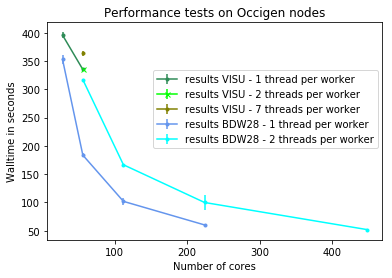

In [47]:
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(cores_visu, results_visu.mean(axis=1), yerr=results_visu.std(axis=1),
             ls='-',marker='o',ms=3,color='seagreen', 
             label='results VISU - 1 thread per worker')
plt.errorbar(cores_visu_multi, results_visu_multi.mean(axis=1), yerr=results_visu_multi.std(axis=1),
             ls='-',marker='x',ms=5,color='lime', 
             label='results VISU - 2 threads per worker')
plt.errorbar(cores_visu_multi7, results_visu_multi7.mean(axis=1), yerr=results_visu_multi7.std(axis=1),
             ls='-',marker='o',ms=3,color='olive', 
             label='results VISU - 7 threads per worker')
plt.errorbar(cores_bdw28, results_bdw28.mean(axis=1), yerr=results_bdw28.std(axis=1),
             ls='-',marker='o',ms=3,color='cornflowerblue', 
             label='results BDW28 - 1 thread per worker')
plt.errorbar(cores_bdw28_multi, results_bdw28_multi.mean(axis=1), yerr=results_bdw28_multi.std(axis=1),
             ls='-',marker='o',ms=3,color='cyan', 
             label='results BDW28 - 2 threads per worker')
plt.legend(loc='center left', bbox_to_anchor=(0.3, 0.6))
plt.xlabel('Number of cores')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on Occigen nodes')
plt.savefig('Perf-occigen-cores-mono-multi.png', bbox_inches='tight')